In [ ]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import statsmodels.formula.api as smf

from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.model_selection import train_test_split,KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Transformation

dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/data.csv")
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
#cleaning

del dataset['Unnamed: 32']
del dataset['id']
dataset.rename(columns={'diagnosis':'Class'},inplace=True)
dataset

,Class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
dataset.groupby('Class').size()

Class
B    357
M    212
dtype: int64

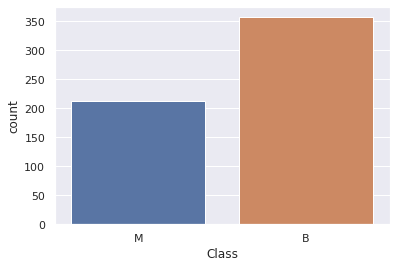

In [ ]:
sns.countplot(x='Class',data=dataset)

In [ ]:
#Label Encoding

le=LabelEncoder()
dataset.Class=le.fit_transform(dataset.Class)
dataset

,Class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
dataset.describe()

,Class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


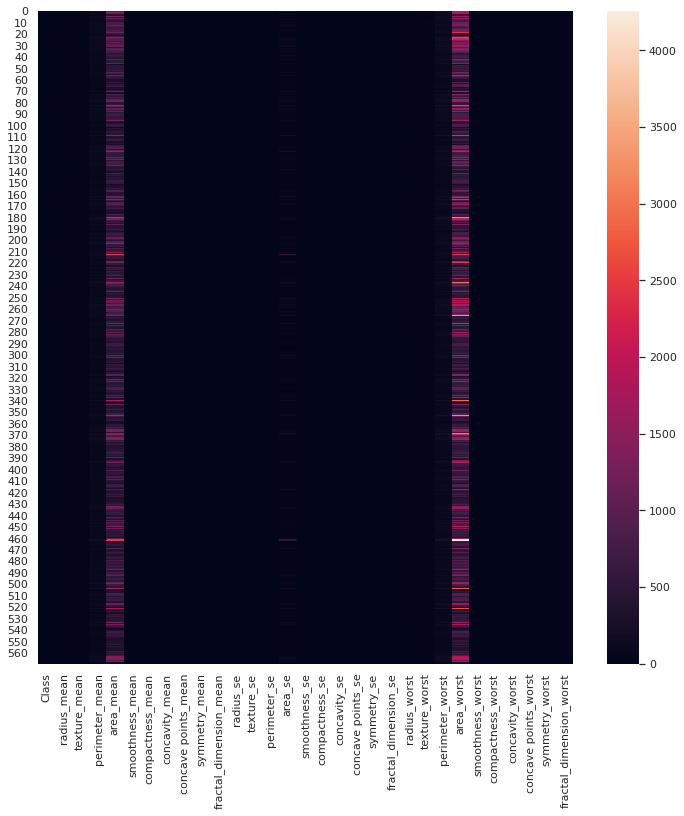

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(dataset)

In [ ]:
array=dataset.values
array

array([[ 1.     , 17.99   , 10.38   , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [ 1.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
       [ 1.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [ 1.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [ 1.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 0.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]])

In [ ]:
X=array[:,1:31]
Y=array[:,0]

In [ ]:
#Normalizing Data
scale=MinMaxScaler()
scale.fit(X)
X=scale.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [ ]:
# Algorithm(1) KNN

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
predictions0 = knn.predict(X_test)
acc1=accuracy_score(Y_test, predictions0)
print("Accuracy = ",acc1,"\n")
print("Confusion Matrix = \n",confusion_matrix(Y_test, predictions0),"\n")
print("Classification Report = \n",classification_report(Y_test, predictions0),"\n")

Accuracy =  0.9415204678362573 

Confusion Matrix = 
 [[116   0]
 [ 10  45]] 

Classification Report = 
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       116
         1.0       1.00      0.82      0.90        55

    accuracy                           0.94       171
   macro avg       0.96      0.91      0.93       171
weighted avg       0.95      0.94      0.94       171
 



In [ ]:
# Algorithm(2) Naive Bayes

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
predictions1 = classifier.predict(X_test)
acc2=accuracy_score(Y_test, predictions1)
print("Accuracy = ",acc2,"\n")
print("Confusion Matrix = \n",confusion_matrix(Y_test, predictions1),"\n")
print("Classification Report = \n",classification_report(Y_test, predictions1),"\n")

Accuracy =  0.9473684210526315 

Confusion Matrix = 
 [[113   3]
 [  6  49]] 

Classification Report = 
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       116
         1.0       0.94      0.89      0.92        55

    accuracy                           0.95       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171
 



In [ ]:
# Algorithm(3) Decision Tree

tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(X_train, Y_train)
predictions2 = tree.predict(X_test)
acc3=accuracy_score(Y_test, predictions2)
print("Accuracy = ",acc3,"\n")
print("Confusion Matrix = \n",confusion_matrix(Y_test, predictions2),"\n")
print("Classification Report = \n",classification_report(Y_test, predictions2),"\n")

Accuracy =  0.9473684210526315 

Confusion Matrix = 
 [[112   4]
 [  5  50]] 

Classification Report = 
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       116
         1.0       0.93      0.91      0.92        55

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171
 



In [ ]:
# Bringing the DL Models
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout # just b/z of Simple data

In [ ]:
model = Sequential() #model(A DL Model)

#Inputlayer(30)
model.add(Dense(64, input_dim=30, activation='relu')) 
model.add(Dense(32, input_dim=30,activation='relu'))
model.add(Dense(16, input_dim=30,activation='relu'))
model.add(Dropout(0.3)) #dropout is to minimize overfitting
model.add(Dense(1)) # output layer
model.add(Activation('sigmoid')) 
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainabl

In [ ]:
# verbose is for printing if 0 no printing if 1 yes printing
# epochs is iterations
# batchsize is amount of data, it picks while training  

history=model.fit(X_train, Y_train, verbose=1, epochs=100, batch_size=64,validation_data=(X_test, Y_test))
predictions4 = model.predict(X_test)
predictions4 = (predictions4 > 0.5)
acc4=accuracy_score(Y_test, predictions4)
print("Accuracy = ",acc4,"\n")
print("Confusion Matrix = \n",confusion_matrix(Y_test, predictions4),"\n")
print("Classification Report = \n",classification_report(Y_test, predictions4),"\n")

Epoch 1/100
7/7 [==============================] - 4s 44ms/step - loss: 0.6910 - accuracy: 0.5176 - val_loss: 0.6748 - val_accuracy: 0.7018
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6603 - accuracy: 0.6558 - val_loss: 0.6480 - val_accuracy: 0.8772
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6288 - accuracy: 0.7915 - val_loss: 0.6175 - val_accuracy: 0.9181
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6006 - accuracy: 0.7889 - val_loss: 0.5851 - val_accuracy: 0.9064
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.5626 - accuracy: 0.8266 - val_loss: 0.5493 - val_accuracy: 0.8947
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5228 - accuracy: 0.8518 - val_loss: 0.5111 - val_accuracy: 0.9006
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.4845 - accuracy: 0.8719 - val_loss: 0.4662 - val_accuracy: 0.9123
Epoch 8/100
7/7 [=====

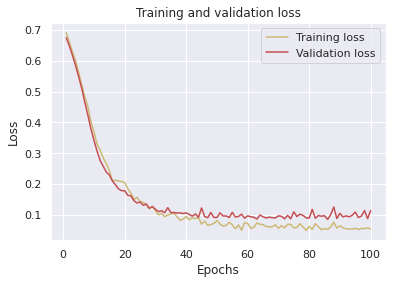

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


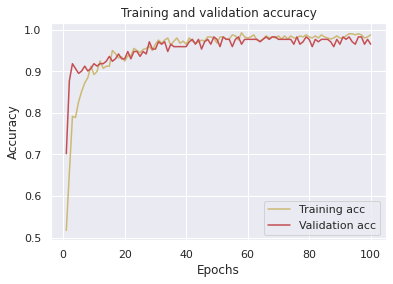

In [ ]:
acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

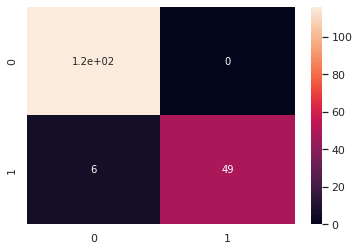

In [ ]:
sns.heatmap(confusion_matrix(Y_test, predictions4),annot=True)

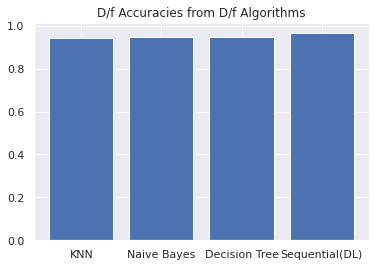

In [ ]:
x=["KNN","Naive Bayes","Decision Tree","Sequential(DL)"]
y=[acc1,acc2,acc3,acc4]
plt.bar(x,y,align="center")
plt.title("D/f Accuracies from D/f Algorithms")
plt.show()